## July 2022

#### Find expected number of steps on soccer ball (Adidas telstar: 20 white hexagons, 12 black pentagons)
-> Random walks on surface

In [160]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dictionary of transitions for football panel states
trans_dict = {  'A':['E','B','F'],
                'B':['A','C','G'],
                'C':['B','D','H'],
                'D':['C','E','I'],
                'E':['A','D','J'],
                'F':['A','K','O'],
                'G':['B','K','L'],
                'H':['C','L','M'],
                'I':['D','M','N'],
                'J':['E','N','O'],
                'K':['F','G','P'],
                'L':['G','H','Q'],
                'M':['H','I','R'],
                'N':['I','J','S'],
                'O':['J','T','F'],
                'P':['K','Q','T'],
                'Q':['P','R','L'],
                'R':['M','Q','S'],
                'S':['R','N','T'],
                'T':['S','O','P']}

In [3]:
class Markov:
    
    def __init__(self, transitions_, starting_state_):
        self.transitions = transitions_
        self.start = starting_state_
        self.current = starting_state_
        self.steps = 0
        
    def next_state(self):
        ''' returns random choice of next state '''
        #print(self.steps, self.current)
        self.steps += 1
        self.current = random.choice(self.transitions[self.current])
        return
    
    def reset(self):
        ''' reset current state and steps '''
        self.current = self.start
        self.steps = 0
        return
    
    def RW_home(self):
        ''' does 1 random walk stops first time returns to starting state, returns num steps'''
        self.next_state()
        while (self.current!=self.start):
            self.next_state()
        #print(self.steps, self.current)
        count = self.steps
        self.reset()
        return count
    
    def record_walk(self, stats):
        ''' record stats of walk to stats obj '''
        count = self.RW_home()
        stats.record_result(count)
        return
    
    def record_RW_home_sims(self, stats, N):
        for i in range(N):
            self.record_walk(stats)
        return

In [152]:
class Stats:
    stat_dict = dict()
    
    def __init__(self):
        return
    
    def record_result(self, result):
        if (result in self.stat_dict):
            self.stat_dict[result] += 1
        else:
            self.stat_dict[result] = 1
        return
    
    def dataframe(self):
        return pd.DataFrame(list(self.stat_dict.items()), columns = ['Walk length', 'Frequency'])
    
    def number_sims(self):
        return sum(self.stat_dict.values())
    
    def prob_length(self, length):
        ''' return estimated prob of walk of that length '''
        return self.stat_dict[length] / sum(self.stat_dict.values())
    
    def expected_value_estimate(self):
        return sum(leng*freq for leng,freq in self.stat_dict.items()) / self.number_sims()

In [5]:
telstar = Markov(trans_dict, 'A')
stats = Stats()

In [6]:
telstar.record_RW_home_sims(stats, 1_000_000)

In [7]:
#number of sims run
stats.number_sims()

1000000

In [8]:
#dataframe of results
df = stats.dataframe()
df.sort_values(by=['Walk length'])

,Walk length,Frequency
0,2,333816
11,4,73768
8,5,24745
24,6,33266
41,7,21926
...,...,...
277,344,1
292,348,1
291,349,1
294,353,1


In [140]:
#prob estimate of walk length = 2
stats.prob_length(2)

0.333816

In [287]:
#prob estimate of walk length = 4
stats.prob_length(4)

0.073768

In [10]:
(2*3) / 3**4

0.07407407407407407

In [11]:
stats.prob_length(5)

0.024745

In [12]:
(2*3) / 3**5

0.024691358024691357

In [13]:
stats.prob_length(6)

0.033266

In [14]:
(3*2*2*2) / 3**6

0.03292181069958848

In [15]:
stats.prob_length(8)

0.02173

In [16]:
(3*2*2*2*2*3) / 3**8

0.02194787379972565

In [17]:
stats.expected_value_estimate()

19.970233

<AxesSubplot:ylabel='Frequency'>

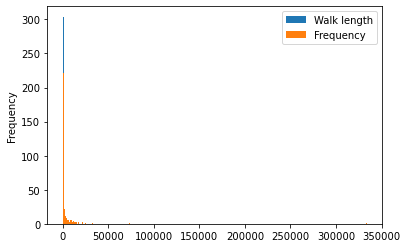

In [18]:
df.plot.hist(bins=270)

## Expected value = 20, need formal proof

Now do sims to estimate probability in flat world

In [ ]:
#ignore
#helper function to get connecting hexagons
def connected(i, j):
    '''return list of connected hexs'''
    if i%2==0: #even
        #inside long side
        long_side_length = i/2 + 1
        bottom_side_length = i/2
    else: #odd
    return

def outer_inner(i):
    '''returns 2 lists of '''

In [224]:
#ignore
class Panel:
    ref = 0
    neighbours = []
    
    def __init__(self, ref_, neighbours_):
        self.ref = ref_
        self.neighbours = neighbours_
    
    def check_neighbour(self, check_ref):
        ans = False
        if (check_ref in self.neighbours):
            ans = True
        return ans

In [229]:
A_1 = Panel('A_1', ['B_1', 'B_2', 'B_3'])

In [37]:
alphabet_up = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']

In [24]:
alphabet_low = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p']

In [ ]:
A_1 = Panel('A_1', ['B_1', 'B_2', 'B_3'])
panels = [A_1]

def create_board(panels, num_shells=11):
    for i in range(1, num_shells):
        for j in range(1, 3*(i-1)+1):
            {alphabet}

In [149]:
panel_dict = {'A_1':['B_1', 'B_2', 'B_3']}

num_shells = 11

for shell in range(2, num_shells+1, 1):
    for pos in range(1, 3*(shell-1) + 1):
        ref = f'{alphabet_up[shell-1]}_{pos}'
        #print(ref)
        neighbours = find_neighbours(shell, pos, panel_dict, alphabet_up)
        panel_dict[ref] = neighbours

C_1 2
C_2 2
C_3 2
C_4 2
C_5 2
C_6 2
D_1 3
D_2 3
D_3 3
D_4 3
D_5 3
D_6 3
D_7 3
D_8 3
D_9 3
E_1 3
E_2 3
E_3 3
E_4 3
E_5 3
E_6 3
E_7 3
E_8 3
E_9 3
E_10 3
E_11 3
E_12 3
F_1 3
F_2 3
F_3 3
F_4 3
F_5 3
F_6 3
F_7 3
F_8 3
F_9 3
F_10 3
F_11 3
F_12 3
F_13 3
F_14 3
F_15 3
G_1 3
G_2 3
G_3 3
G_4 3
G_5 3
G_6 3
G_7 3
G_8 3
G_9 3
G_10 3
G_11 3
G_12 3
G_13 3
G_14 3
G_15 3
G_16 3
G_17 3
G_18 3
H_1 3
H_2 3
H_3 3
H_4 3
H_5 3
H_6 3
H_7 3
H_8 3
H_9 3
H_10 3
H_11 3
H_12 3
H_13 3
H_14 3
H_15 3
H_16 3
H_17 3
H_18 3
H_19 3
H_20 3
H_21 3
I_1 3
I_2 3
I_3 3
I_4 3
I_5 3
I_6 3
I_7 3
I_8 3
I_9 3
I_10 3
I_11 3
I_12 3
I_13 3
I_14 3
I_15 3
I_16 3
I_17 3
I_18 3
I_19 3
I_20 3
I_21 3
I_22 3
I_23 3
I_24 3
J_1 3
J_2 3
J_3 3
J_4 3
J_5 3
J_6 3
J_7 3
J_8 3
J_9 3
J_10 3
J_11 3
J_12 3
J_13 3
J_14 3
J_15 3
J_16 3
J_17 3
J_18 3
J_19 3
J_20 3
J_21 3
J_22 3
J_23 3
J_24 3
J_25 3
J_26 3
J_27 3
K_1 3
K_2 3
K_3 3
K_4 3
K_5 3
K_6 3
K_7 3
K_8 3
K_9 3
K_10 3
K_11 3
K_12 3
K_13 3
K_14 3
K_15 3
K_16 3
K_17 3
K_18 3
K_19 3
K_20 3
K_21 3
K_22 3


In [146]:
def find_neighbours(shell, pos, panel_dict, alphabet_up):
    ref = f'{alphabet_up[shell-1]}_{pos}'
    neighbours = []
    
    #search dict for neighbours already
    for tup in list(panel_dict.items()):
        if ref in tup[1]:
            neighbours.append(tup[0])
    
    #alt case for B
    if shell==2:
        if pos==1:
            neighbours += ['C_1', 'C_6']
        if pos==2:
            neighbours += ['C_2', 'C_3']
        if pos==3:
            neighbours += ['C_4', 'C_5']
        return neighbours
    
    #find new neighbours
    no_left = 3 - len(neighbours)
    
    #if i = even shell
    if shell%2 == 0:
        corners = find_corners(shell)
        
        #j how many long short and remainder?
    #long
    
    
    print(ref, no_left)
    return neighbours
    
#def remaining_neighbours()

In [150]:
panel_dict

{'A_1': ['B_1', 'B_2', 'B_3'],
 'B_1': ['A_1', 'C_1', 'C_6'],
 'B_2': ['A_1', 'C_2', 'C_3'],
 'B_3': ['A_1', 'C_4', 'C_5'],
 'C_1': ['B_1'],
 'C_2': ['B_2'],
 'C_3': ['B_2'],
 'C_4': ['B_3'],
 'C_5': ['B_3'],
 'C_6': ['B_1'],
 'D_1': [],
 'D_2': [],
 'D_3': [],
 'D_4': [],
 'D_5': [],
 'D_6': [],
 'D_7': [],
 'D_8': [],
 'D_9': [],
 'E_1': [],
 'E_2': [],
 'E_3': [],
 'E_4': [],
 'E_5': [],
 'E_6': [],
 'E_7': [],
 'E_8': [],
 'E_9': [],
 'E_10': [],
 'E_11': [],
 'E_12': [],
 'F_1': [],
 'F_2': [],
 'F_3': [],
 'F_4': [],
 'F_5': [],
 'F_6': [],
 'F_7': [],
 'F_8': [],
 'F_9': [],
 'F_10': [],
 'F_11': [],
 'F_12': [],
 'F_13': [],
 'F_14': [],
 'F_15': [],
 'G_1': [],
 'G_2': [],
 'G_3': [],
 'G_4': [],
 'G_5': [],
 'G_6': [],
 'G_7': [],
 'G_8': [],
 'G_9': [],
 'G_10': [],
 'G_11': [],
 'G_12': [],
 'G_13': [],
 'G_14': [],
 'G_15': [],
 'G_16': [],
 'G_17': [],
 'G_18': [],
 'H_1': [],
 'H_2': [],
 'H_3': [],
 'H_4': [],
 'H_5': [],
 'H_6': [],
 'H_7': [],
 'H_8': [],
 'H_9': [],


In [234]:
panel_dict = {'A_1':['B_1', 'B_2', 'B_3']}

In [238]:
for item in panel_dict.items():
    print(item[1])

['B_1', 'B_2', 'B_3']


In [26]:
panel_dict

{'A_1': ['B_1', 'B_2', 'B_3'], 'C_1': None}

In [134]:
def find_corners(shell):
    ''' find corners of hexagon'''
    corners = [1]
    if shell%2==0: #even
        long = shell/2
        short = shell/2 - 1
        #print('long:', long, 'short:', short, 'max:', 3*(shell-1))
        pos = 1
        long_ = True
        #print(pos)
        while (pos <= 3*(shell-1) - short):
            #print(pos)
            if long_:
                pos += long
                corners.append(pos)
                long_ = False
            else:
                pos += short
                corners.append(pos)
                long_ = True
    else: #odd
        max_ = 3*(shell-1)
        edge = shell // 2
        corners += [k*edge + 1 for k in range(1,6)]
    return corners

In [151]:
find_corners(7)

[1, 4, 7, 10, 13, 16]

In [8]:
from operator import add

In [11]:
#Use hexagonal grid system
# list of 3 entries [q,r,s]

home  = [0,0,0]
moves_even = [[0,-1,+1], [+1,0,-1], [-1,+1,0]]
moves_odd = [[-1,0,+1], [+1,-1,0], [0,+1,-1]]

moves_alph = ['a', 'b', 'c']

def move_coord(list1, list2):
    return list(map(add, list1, list2))

def check_home(coord):
    print(coord)
    if coord ==[0,0,0]:
        return True
    return False

def possible_moves(even):
    if even: return [[0,-1,+1], [+1,0,-1], [-1,+1,0]]
    else: return [[-1,0,+1], [+1,-1,0], [0,+1,-1]]

#def count_homes()

#def rand

# def endpoints(number_steps):
#     '''return list of possible endpoints for N steps'''
#     even = True
#     while number_steps > 0:

        
def paths(even, steps_left, coord):
    if (steps_left == 2):
        for move in possible_moves(even):
            coord = move_coord(coord, move)
            even = not even
            steps_left -= 1
            paths(even, steps_left, coord)
    elif (steps_left == 0) or (coord == [0,0,0]):
        print(coord)
        return
    else:
        for move in possible_moves(even):
            coord = move_coord(coord, move)
            even = not even
            steps_left -= 1
            paths(even, steps_left, coord)

def next_coord(even, coord):
    next_coords = []
    for move in possible_moves(even):
        next_coords.append(move_coord(coord, move))
    return next_coords

def endpoints(even, ends):
    if ends == [0,0,0]:
        return next_coord(True, [0,0,0])
    next_coords = []
    for coord in ends:
        next_coords += next_coord(even, coord)
    return next_coords

def remove_homes(lst):
    new = []
    for item in lst:
        if item != [0,0,0]:
            new.append(item)
    return new

def count_homes(lst):
    count = 0
    for item in lst:
        if item == [0,0,0]:
            count += 1
    return count

def num_paths_home(steps):
    ''' number of paths making it home for first time in n steps '''
    ends_ = [0,0,0]
    even = True
    print('step', 'destinations', 'probability')
    print(0, ends_)
    for i in range(1, steps+1):
        ends_ = endpoints(even, ends_)
        #ends_ = new_ends
        print(i, f'{count_homes(ends_)} / {3**i}', count_homes(ends_) / 3**i)
        ends_ = remove_homes(ends_)
        even = not even
    return

def mod(coord):
    sum_ = 0
    for num in coord:
        sum_ += abs(num)
    return sum_

def steps_away(coord):
    ''' return min number of steps from home '''
    return mod(coord)/2

def remove_steps_away(lst, steps_left):
    ends = []
    for coord in lst:
        if (steps_away(coord) < steps_left):
            ends.append(coord)
    return ends

# def num_paths_home_remove(steps):
#     ''' number of paths making it home for first time in n steps '''
#     ends_ = [0,0,0]
#     even = True
#     print('step', 'destinations', 'probability')
#     print(0, ends_)
#     for i in range(1, steps+1):
#         ends_ = endpoints(even, ends_)
#         for (i > 16):
#             ends_ = remove_steps_away(ends_, steps - i)
#         #ends_ = new_ends
#         print(i, f'{count_homes(ends_)} / {3**i}', count_homes(ends_) / 3**i)
#         ends_ = remove_homes(ends_)
#         even = not even
#     return

In [13]:
endpoints(False, next_coord(True, [0,0,0]))

[[-1, -1, 2],
 [1, -2, 1],
 [0, 0, 0],
 [0, 0, 0],
 [2, -1, -1],
 [1, 1, -2],
 [-2, 1, 1],
 [0, 0, 0],
 [-1, 2, -1]]

In [3]:
abs(-1)

1

In [4]:
3**20

3486784401

In [5]:
check_home(move_coord(move_coord(home, moves_even[1]), moves_odd[0]))

[0, 0, 0]


True

In [6]:
next_coord(True, [0,0,0])

[[0, -1, 1], [1, 0, -1], [-1, 1, 0]]

In [7]:
endpoints(False,next_coord(True, [0,0,0]))

[[-1, -1, 2],
 [1, -2, 1],
 [0, 0, 0],
 [0, 0, 0],
 [2, -1, -1],
 [1, 1, -2],
 [-2, 1, 1],
 [0, 0, 0],
 [-1, 2, -1]]

In [8]:
remove_homes(endpoints(False,next_coord(True, [0,0,0])))

[[-1, -1, 2], [1, -2, 1], [2, -1, -1], [1, 1, -2], [-2, 1, 1], [-1, 2, -1]]

In [9]:
endpoints(True, [0,0,0])

[[0, -1, 1], [1, 0, -1], [-1, 1, 0]]

In [10]:
num_paths_home(20)

step destinations probability
0 [0, 0, 0]
1 0 / 3 0.0
2 3 / 9 0.3333333333333333
3 0 / 27 0.0
4 6 / 81 0.07407407407407407
5 0 / 243 0.0
6 30 / 729 0.0411522633744856
7 0 / 2187 0.0
8 180 / 6561 0.027434842249657063
9 0 / 19683 0.0
10 1188 / 59049 0.020118884316415182
11 0 / 177147 0.0
12 8322 / 531441 0.01565931119352854
13 0 / 1594323 0.0
14 60714 / 4782969 0.01269378915063008
15 0 / 14348907 0.0
16 456174 / 43046721 0.010597183464914783
17 0 / 129140163 0.0


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\jamie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-0e57992b2d3a>", line 1, in <module>
    num_paths_home(20)
  File "<ipython-input-2-87376d115283>", line 85, in num_paths_home
    ends_ = endpoints(even, ends_)
  File "<ipython-input-2-87376d115283>", line 61, in endpoints
    next_coords += next_coord(even, coord)
  File "<ipython-input-2-87376d115283>", line 53, in next_coord
    next_coords.append(move_coord(coord, move))
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\jamie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, 

TypeError: object of type 'NoneType' has no len()

In [98]:
num_paths_home_remove(21)

step destinations probability
0 [0, 0, 0]
1 0 / 3 0.0
2 3 / 9 0.3333333333333333
3 0 / 27 0.0
4 6 / 81 0.07407407407407407
5 0 / 243 0.0
6 30 / 729 0.0411522633744856
7 0 / 2187 0.0
8 180 / 6561 0.027434842249657063
9 0 / 19683 0.0
10 1188 / 59049 0.020118884316415182
11 0 / 177147 0.0
12 8322 / 531441 0.01565931119352854
13 0 / 1594323 0.0
14 60714 / 4782969 0.01269378915063008
15 0 / 14348907 0.0
16 456174 / 43046721 0.010597183464914783



KeyboardInterrupt



In [29]:
3/9 + 6/81 + 30/729 + 180/6561 + 1188/59049 + 8322/531441 + 60714/4782969 + 456174/43046721

0.5350636811570387

In [30]:
1 - 0.5350636811570387

0.46493631884296127

In [13]:
import numpy as np

In [14]:
## optimise with numpy
home = np.array([0,0,0])
moves_even = np.array([[0,-1,+1], [+1,0,-1], [-1,+1,0]])
moves_odd = np.array([[-1,0,+1], [+1,-1,0], [0,+1,-1]])

In [19]:
np.array([ home + np.array([-1,0,+1]), home + np.array([+1,-1,0]), home + np.array([0,+1,-1])])

array([[ 0, -1,  1],
       [ 1,  0, -1],
       [-1,  1,  0]])

In [89]:
def next_coords_np(coord, even):
    '''return possible coords to move to'''
    if even:
        return np.array([[0,-1,+1], [+1,0,-1], [-1,+1,0]]) + coord
    else:
        return np.array([[-1,0,+1], [+1,-1,0], [0,+1,-1]]) + coord

def possible_coords_np(coords, even):
    '''return possible coords to move to for a list'''
    if np.shape(coords)==(3,):
        return next_coords_np(coords, even)
    poss = np.empty((1,3))
    for coord in coords:
        #print(next_coords_np(coord, even))
        poss = np.concatenate((poss, next_coords_np(coord, even)))
    return poss[1:]

# def remove_homes_np(coords):
#     '''remove home coords from array of coords'''
#     new = np.delete(coords, np.where(coords == 0)[0], axis=0)
#     if np.shape(new) == (0, 3):
#         return coords
#     return new

#a[~(a==0).all(1)]
def remove_homes_np(coords):
    '''remove home coords from array of coords'''
    return coords[~(coords==0).all(1)]
    #if np.shape(new) == (0, 3):
    #    return coords
    #return new

def count_homes_np(coords):
    '''count home coords from array of coords'''
    #return (np.absolute(coords).sum() < 1.).sum()
    return np.sum(~coords.any(1))

def num_paths_home_np(home, steps):
    paths = home
    even = True
    print('step', 'destinations', 'probability')
    for i in range(1, steps+1):
        paths = possible_coords_np(paths, even)
        print(i, f'{count_homes_np(paths)} / {3**i}', count_homes_np(paths) / 3**i)
        #print('paths, length:', len(paths))
        #print(paths)
        paths = remove_homes_np(paths)
        #print('removed, length', len(paths))
        #print(paths)
        even = not even
    return


#trying to optimise
def possible_coords_np_tiles_even(coords):
    '''return possible coords to move to for a list'''
    leng = len(coords)
    poss = np.tile(coords_2, (3,1))
    #print(leng, np.shape(poss))
    for i in range(leng):
        poss[i] = coords[i] + np.array([0,-1,+1])
        poss[i+leng] = coords[i] + np.array([+1,0,-1])
        poss[i+2*leng] = coords[i] + np.array([-1,+1,0])
    return poss

def possible_coords_np_zeros_even(coords):
    '''return possible coords to move to for a list'''
    leng = len(coords)
    poss = np.zeros((3*leng, 3))
    #print(leng, np.shape(poss))
    for i in range(leng):
        poss[i] = coords[i] + np.array([0,-1,+1])
        poss[i+leng] = coords[i] + np.array([+1,0,-1])
        poss[i+2*leng] = coords[i] + np.array([-1,+1,0])
    return poss

def possible_coords_np_tiles_odd(coords):
    '''return possible coords to move to for a list'''
    leng = len(coords)
    poss = np.tile(coords_2, (3,1))
    #print(leng, np.shape(poss))
    for i in range(leng):
        poss[i] = coords[i] + np.array([-1,0,+1])
        poss[i+leng] = coords[i] + np.array([+1,-1,0])
        poss[i+2*leng] = coords[i] + np.array([0,+1,-1])
    return poss

def possible_coords_np_zeros_odd(coords):
    '''return possible coords to move to for a list'''
    leng = len(coords)
    poss = np.zeros((3*leng, 3))
    #print(leng, np.shape(poss))
    for i in range(leng):
        poss[i] = coords[i] + np.array([-1,0,+1])
        poss[i+leng] = coords[i] + np.array([+1,-1,0])
        poss[i+2*leng] = coords[i] + np.array([0,+1,-1])
    return poss


# def possible_coords_np_resize(coords):
#     '''return possible coords to move to for a list'''
#     leng = len(coords)
#     poss = np.array((coords, coords, coords))
#     #print(leng, np.shape(poss))
#     for i in range(leng):
#         poss[i] = coords[i] + np.array([-1,0,+1])
#         poss[i+leng] = coords[i] + np.array([+1,-1,0])
#         poss[i+2*leng] = coords[i] + np.array([0,+1,-1])
#     return poss

def num_paths_home_np_zeros(home, steps):
    paths = home
    print('step', 'destinations', 'probability')
    for i in range(1, steps+1):
        if i%2 == 0: paths = possible_coords_np_zeros_even(paths)
        else: paths = possible_coords_np_zeros_odd(paths)
        print(i, f'{count_homes_np(paths)} / {3**i}', count_homes_np(paths) / 3**i)

        #paths = remove_homes_np(paths)
    return

In [90]:
coords_2 = np.array([[-1., -1.,  2.],
       [ 1., -2.,  1.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 2., -1., -1.],
       [ 1.,  1., -2.],
       [-2.,  1.,  1.],
       [ 0.,  0.,  0.],
       [-1.,  2., -1.]])

In [91]:
np.vstack([coords_2]*2)

array([[-1., -1.,  2.],
       [ 1., -2.,  1.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 2., -1., -1.],
       [ 1.,  1., -2.],
       [-2.,  1.,  1.],
       [ 0.,  0.,  0.],
       [-1.,  2., -1.],
       [-1., -1.,  2.],
       [ 1., -2.,  1.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 2., -1., -1.],
       [ 1.,  1., -2.],
       [-2.,  1.,  1.],
       [ 0.,  0.,  0.],
       [-1.,  2., -1.]])

In [92]:
len(np.tile(coords_2, (3,1)))

27

In [93]:
coords_3 = possible_coords_np(coords_2, True)

In [94]:
%timeit possible_coords_np(coords_3, False)
%timeit possible_coords_np_zeros_odd(coords_3)
%timeit possible_coords_np_tiles_odd(coords_3)

239 µs ± 24 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


KeyboardInterrupt: 

In [ ]:
remove_homes_np_2(arr_1)

In [ ]:
count_homes_np(coords_2)

In [ ]:
possible_coords_np(home, True)

In [183]:
possible_coords_np(home, True)

array([[ 0, -1,  1],
       [ 1,  0, -1],
       [-1,  1,  0]])

In [194]:
arr_1 = np.array([[ 0, -1,  1],
       [ 1,  0, -1],
       [-1,  1,  0]])
possible_coords_np(arr_1, False)

[[-1 -1  2]
 [ 1 -2  1]
 [ 0  0  0]]
[[ 0  0  0]
 [ 2 -1 -1]
 [ 1  1 -2]]
[[-2  1  1]
 [ 0  0  0]
 [-1  2 -1]]


array([[-1., -1.,  2.],
       [ 1., -2.,  1.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 2., -1., -1.],
       [ 1.,  1., -2.],
       [-2.,  1.,  1.],
       [ 0.,  0.,  0.],
       [-1.,  2., -1.]])

In [191]:
np.shape(np.concatenate([arr_1, arr_1]))

(6, 3)

In [181]:
arr + np.array([[4, 5, 6], [6, 4, 5], [5, 6, 4]])

ValueError: operands could not be broadcast together with shapes (0,) (3,3) 

In [103]:
np.shape([[-1, -1,  2],
 [ 1, -2,  1],
 [ 0,  0,  0]])

(3, 3)

In [159]:
np.shape([-1, -1,  2]) == (3,)

True

In [17]:
num_paths_home_np(np.array([0,0,0]), 15)

step destinations probability
1 0 / 3 0.0
2 3 / 9 0.3333333333333333
3 0 / 27 0.0
4 6 / 81 0.07407407407407407
5 0 / 243 0.0
6 30 / 729 0.0411522633744856
7 0 / 2187 0.0
8 180 / 6561 0.027434842249657063
9 0 / 19683 0.0
10 1188 / 59049 0.020118884316415182
11 0 / 177147 0.0
12 8322 / 531441 0.01565931119352854


KeyboardInterrupt: 

In [250]:
arr_3 = np.array([[-1., -2.,  3.,],
 [ 0., -1.,  1.],
 [-2., 0.,  2.],
 [ 1., -3.,  2.],
 [ 2., -2.,  0.],
 [ 0., -1.,  1.],
 [ 2., -2.,  0.],
 [ 3., -1., -2.],
 [ 1.,  0., -1.],
 [ 1.,  0., -1.],
 [ 2.,  1., -3.],
 [ 0.,  2., -2.],
 [-2.,  0.,  2.],
 [-1.,  1.,  0.],
 [-3.,  2.,  1.],
 [-1., 1.,  0.],
 [ 0.,  2., -2.],
 [-2.,  3., -1.]])

In [252]:
len(arr_3)

18

In [265]:
remove_homes_np_2(arr_3)

array([[-1., -2.,  3.],
       [ 0., -1.,  1.],
       [-2.,  0.,  2.],
       [ 1., -3.,  2.],
       [ 2., -2.,  0.],
       [ 0., -1.,  1.],
       [ 2., -2.,  0.],
       [ 3., -1., -2.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 2.,  1., -3.],
       [ 0.,  2., -2.],
       [-2.,  0.,  2.],
       [-1.,  1.,  0.],
       [-3.,  2.,  1.],
       [-1.,  1.,  0.],
       [ 0.,  2., -2.],
       [-2.,  3., -1.]])

In [95]:
num_paths_home_np_zeros(np.array([0,0,0]), 15)

step destinations probability
1 0 / 3 0.0
2 9 / 9 1.0
3 0 / 27 0.0
4 45 / 81 0.5555555555555556
5 0 / 243 0.0
6 279 / 729 0.38271604938271603
7 0 / 2187 0.0
8 1917 / 6561 0.29218106995884774
9 0 / 19683 0.0
10 13959 / 59049 0.23639689071787837
11 0 / 177147 0.0
12 105507 / 531441 0.19853003437822825
13 0 / 1594323 0.0


KeyboardInterrupt: 

In [156]:
#Monte carlo attempt
home = np.array([0,0,0])
moves_even = np.array([[0,-1,+1], [+1,0,-1], [-1,+1,0]])
moves_odd = np.array([[-1,0,+1], [+1,-1,0], [0,+1,-1]])

def next_step(coord, even):
    if even:
        return coord + moves_even[np.random.choice(np.array([0,1,2]))]
    else: return coord + moves_odd[np.random.choice(np.array([0,1,2]))]

def sim():
    step = 0
    coord = np.array([0,0,0])
    even = True
    while step < 21:
        coord = next_step(coord, even)
        even = not even
        step +=1
        if np.all(coord == 0):
            return step
    return step

def MC_RW_(numbersims, stats):
    for i in range(numbersims):
        stats.record_result(sim())
    return

In [157]:
stats = Stats()

In [170]:
MC_RW_(100000, stats)

In [168]:
df = stats.dataframe()
df.sort_values(by=['Walk length'])

,Walk length,Frequency
2,2,70400
1,4,15634
7,6,8659
8,8,5737
0,10,4235
6,12,3296
9,14,2655
10,16,2256
3,18,1880
5,20,1687


In [166]:
stats.prob_length(21) 

0.450018018018018

In [169]:
stats.prob_length(21)

0.4481563981042654

In [171]:
stats.prob_length(21) 

0.44842443729903536

In [172]:
stats.number_sims()

311000

In [173]:
MC_RW_(89000, stats)

In [179]:
print(stats.number_sims(), '{0:.15f}'.format(stats.prob_length(21)))

400000 0.448520000000000


In [180]:
for i in range(10):
    MC_RW_(100000, stats)
    print(stats.number_sims(), '{0:.15f}'.format(stats.prob_length(21)))

500000 0.447918000000000
600000 0.448078333333333
700000 0.448172857142857
800000 0.448335000000000
900000 0.448721111111111
1000000 0.448252000000000
1100000 0.448250000000000
1200000 0.448240000000000
1300000 0.448325384615385
1400000 0.448385714285714


In [183]:
stats2 = Stats()

In [184]:
for i in range(16):
    MC_RW_(100000, stats2)
    print(stats2.number_sims(), '{0:.15f}'.format(stats2.prob_length(21)))

1793245 0.448343645179549
1893245 0.448253131528144
1993245 0.448187754139607
2093245 0.448141999622596
2193245 0.448177928138443
2293245 0.448125254824495
2393245 0.448059851791187
2493245 0.448124432215847
2593245 0.448106908525805
2693245 0.448103310318965
2793245 0.448086365499625
2893245 0.448054001648668
2993245 0.448004089207532
3093245 0.447965162798291
3193245 0.447998196192275
3293245 0.448021632159162


In [2]:
## OOP helper functions
def is_even(q, r, s):
    if ((abs(q) + abs(r) + abs(s))/2) % 2 == 0:
        return True
    return False

def add(str_1, str_2):
    return str(int(str_1[]

def get_connections(str_, even):
    for 

In [6]:
is_even(1,-1,2)

True

In [ ]:
## Attempt using OOP

class Node:
    def __init__(str_):
        self.coord = str_
        self.even = is_even(q,r,s)
        self.connections = get_connections(str_, even)

In [39]:
## make problem smaller by making two moves one and all nodes are even
from operator import add

poss_moves = [[-1, -1, 2], [1, -2, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [2, -1, -1], [1, 1, -2], [-2, 1, 1], [-1, 2, -1]]

def move_coord(list1, list2):
    return list(map(add, list1, list2))

def next_coords(coord):
    next_ = []
    for move in poss_moves:
        next_.append(move_coord(coord, move))
    return next_

def next_coords_vec(vec_coords):
    next_ = []
    for coord in vec_coords:
        next_ += next_coords(coord)
    return next_

def remove_homes(lst):
    new = []
    for item in lst:
        if item != [0,0,0]:
            new.append(item)
    return new

def reduce_homes(lst):
    new = [[0,0,0]]
    for item in lst:
        if item != [0,0,0]:
            new.append(item)
    return new

def reduce_one_home(lst):
    for i in range(0, len(lst)):
        if lst[i] == [0,0,0]:
            break
    return lst[:i] + lst[i+1:]

def count_homes(lst):
    count = 0
    for item in lst:
        if item == [0,0,0]:
            count += 1
    return count

##################

def print_paths(n, dict_):
    #N = int(n/2)
    #print('steps:', 'paths home:', 'len coords:', 'rm before:', 'rm after:')
    coords = poss_moves
    print(2, count_homes(coords))
    for i in range(4, n+2, 2):
        #print('================')
        #print('STEPS =', i)
        coords = remove_homes(coords)
        coords = next_coords_vec(coords)
        #print('num paths', len(coords))
        if (i == 20):
            print(i, count_homes(coords), len(coords))
            return
        before = len(coords)
        coords = remove_steps_away(coords, 20-i, dict_)
        after = len(coords)
        print(i, count_homes(coords), len(coords), before, after)
    return

def diff(dict_, next_coords):
    dict_lst = []
    shell = []
    for value in dict_.values():
        for coord in value:
            if coord in value:
                dict_lst.append(coord)
    #print('dict_lst: ', dict_lst)
    for coord_ in next_coords:
        if coord_ not in dict_lst:
            shell.append(coord_)
    return shell

def remove_dups(lst):
    no_dups = []
    for coord in lst:
        if coord not in no_dups:
            no_dups.append(coord)
    return no_dups

steps_away_dict = {0:[[0,0,0]]}
def generate_steps_away(dict_, n):
    coords = remove_homes(poss_moves)
    dict_[2] = coords
    for i in range(4, n+2, 2):
        next_coords = next_coords_vec(coords)
        diff_ = remove_dups(diff(dict_, next_coords))
        dict_[i] = diff_
        coords = next_coords
        #print(i)
    return

generate_steps_away(steps_away_dict, 14)

def coord_to_str(coord):
    str_ = str(coord[0]) + '_' + str(coord[1]) + '_' + str(coord[2])
    return str_

#doesnt work!!
# def str_to_coord(str_):
#     return [int(str_[0]), int(str_[2]), int(str_[4])]

reverse_steps_away = dict()
for k, v in steps_away_dict.items():
    for coord in v:
        reverse_steps_away[coord_to_str(coord)] = k
        
def steps_away(dict_, coord):
    str_ = coord_to_str(coord)
    if str_ in dict_:
        return dict_[str_]
    else: return None
    
def remove_steps_away(lst, steps_left, dict_):
    coords = []
    for coord in lst:
        if (steps_away(dict_, coord) <= steps_left):
            coords.append(coord)
    return coords

In [ ]:
print_paths(20, reverse_steps_away)

2 3
4 6 54 54 54
6 30 432 432 432
8 180 3618 3618 3618
10 1188 30942 30942 30942
12 8322 262566 267786 262566
14 60714 1951974 2288196 1951974
16 456174 10429932 17021340 10429932
18 3504630 30902736 89763822 30902736


In [66]:
Ans = 1 - 3/(3**2) - 6/(3**4) - 30/(3**6) - 180/(3**8) - 1188/(3**10) - 8322/(3**12) - 60714/(3**14) - 456174/(3**16) - 3504603/(3**18) - 27398106/(3**20)
#1 - Ans
Ans

0.4480326258635227

In [38]:
remove_steps_away(poss_moves, 2, reverse_steps_away)

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [50]:
##dictionary approach

poss_moves = [[-1, -1, 2], [1, -2, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [2, -1, -1], [1, 1, -2], [-2, 1, 1], [-1, 2, -1]]

from operator import add

def move_coord(list1, list2):
    return list(map(add, list1, list2))

def next_coords_ls(coord):
    next_ = []
    for move in poss_moves:
        next_.append(move_coord(coord, move))
    return next_

def remove_homes(lst):
    new = []
    for item in lst:
        if item != [0,0,0]:
            new.append(item)
    return new

def coord_to_str(coord):
    str_ = str(coord[0]) + '_' + str(coord[1]) + '_' + str(coord[2])
    return str_

def str_to_coord(str_):
    coord = str_.split('_')
    coord = [int(s) for s in coord]
    return coord

#prepare dicts
dict_2 = dict( (coord_to_str(coord), 1) for coord in remove_homes(poss_moves))
dict_2['0_0_0'] = 3
master_dict = dict( (i, dict()) for i in range(2, 22, 2))
master_dict[2] = dict_2
#print(dict_2)
#print(master_dict)


def fill_dict(master_dict_, N):
    '''fill dictionary step by step'''
    for i in range(4, N+2, 2):
        update_master(master_dict_ , i)
    return

def update_master(dict_, step):
    '''update master for one step'''
    for coord_str, count in dict_[step-2].items():
        update_by_coord(dict_[step], coord_str, count)
    return

def update_by_coord(dict_, coord_str, count):
    if coord_str == '0_0_0':
        return
    next_coords_ = next_coords_str(coord_str)
    for next_coord_str in next_coords_:
        if next_coord_str in dict_:
            dict_[next_coord_str] += count
        else: dict_[next_coord_str] = count
    return
    
def next_coords_str(coord_str):
    '''return list of next coord strs for a given coord_str'''
    coord = str_to_coord(coord_str)
    return [coord_to_str(next_) for next_ in next_coords_ls(coord)]

In [51]:
fill_dict(master_dict, 20)

In [59]:
master_dict[20]['0_0_0']

27398106

In [67]:
def find_prob(dict_, N=20):
    sum_ = 1
    for i in range(2, N+2, 2):
        sum_ -= (dict_[i]['0_0_0'] / (3**i))
    return sum_

find_prob(master_dict)

0.4480325561718033

In [61]:
for i in range(2, 22, 2):
    print(master_dict[i]['0_0_0'])

3
6
30
180
1188
8322
60714
456174
3504630
27398106
